# 1. SalePriceとの相関をヒートマップで可視化する


SalePriceとの相関:
 SalePrice       1.000000
OverallQual     0.701573
GrLivArea       0.640551
GarageCars      0.590731
ExterQual       0.588637
GarageArea      0.581248
KitchenQual     0.580594
BsmtQual        0.563396
YearBuilt       0.556647
FullBath        0.545586
YearRemodAdd    0.525288
TotalBsmtSF     0.519833
GarageFinish    0.517759
1stFlrSF        0.492049
GarageYrBlt     0.459100
TotRmsAbvGrd    0.451722
HeatingQC       0.434793
LotArea         0.366498
Name: SalePrice, dtype: float64


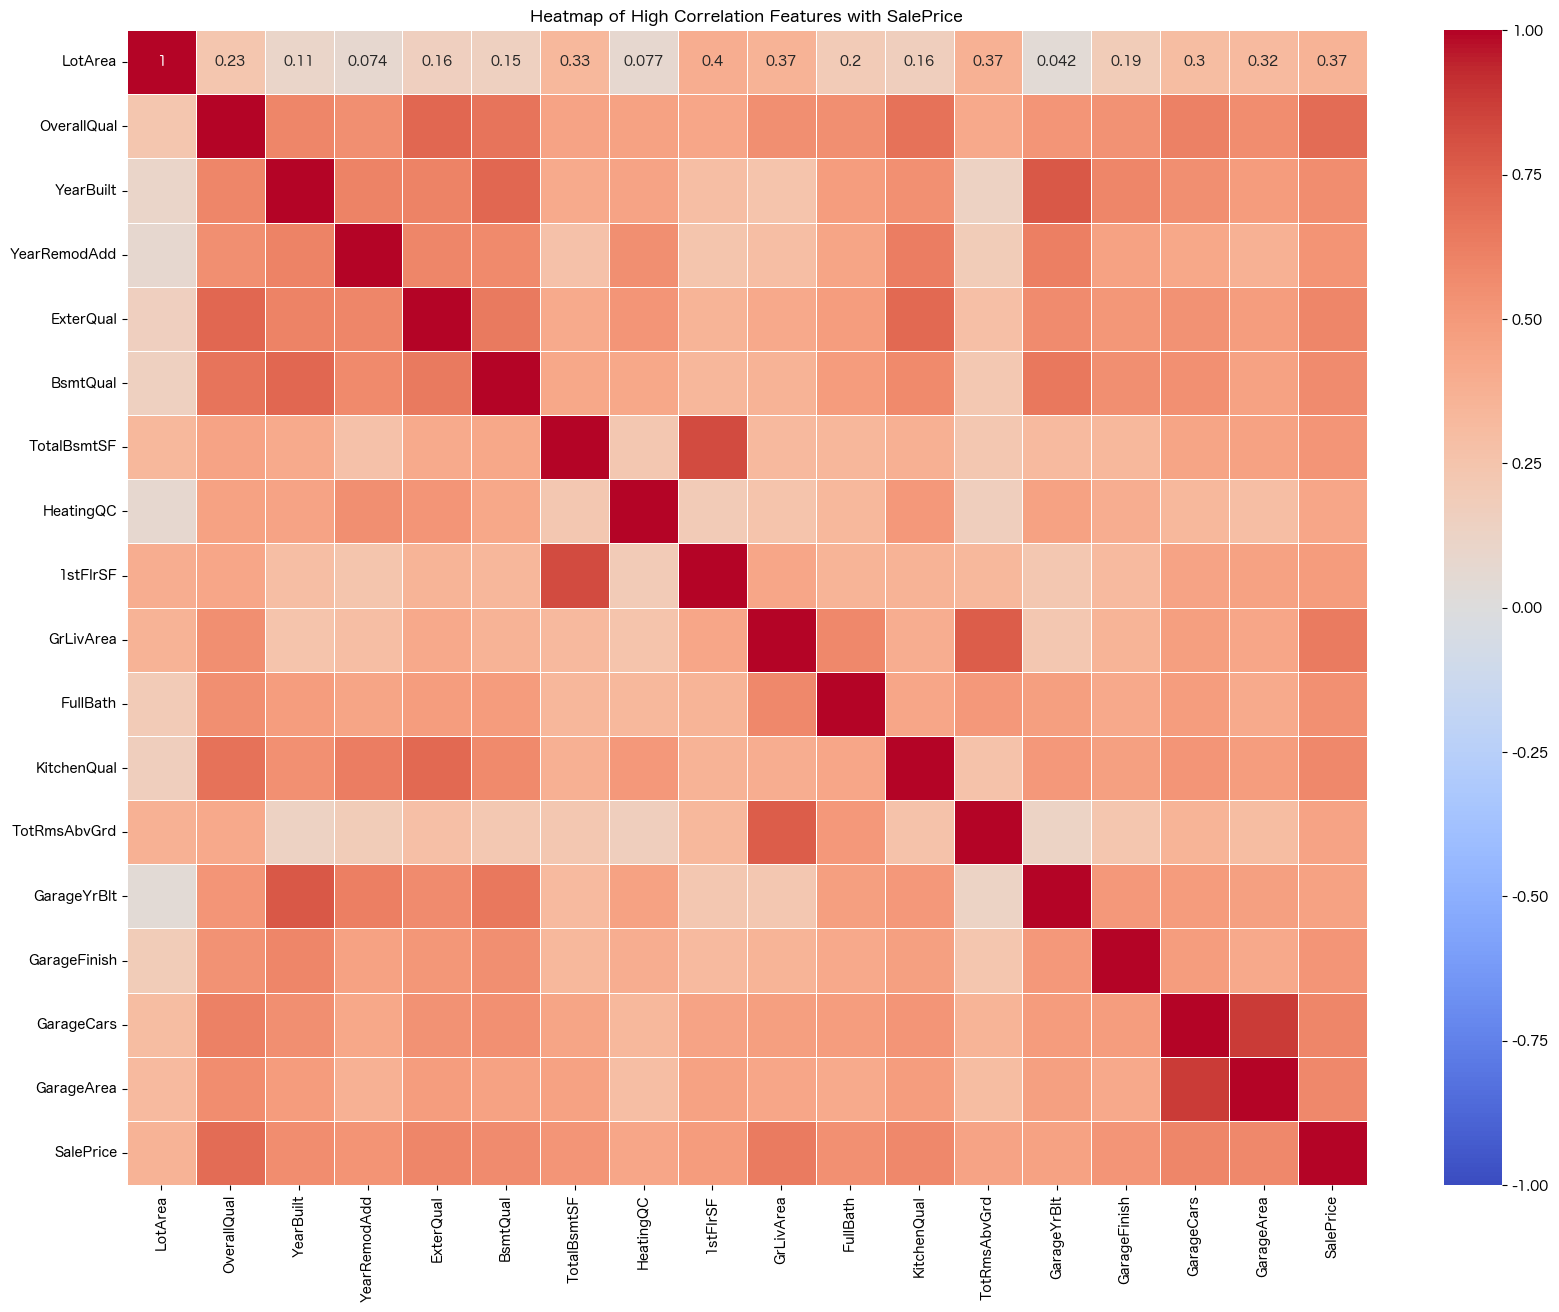

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train19.csv'
data_cleaned = pd.read_csv(data_path)

# 数値型の特徴量のみを対象とする
numeric_features = data_cleaned.select_dtypes(include=[np.number])

# SalePriceとの相関を計算
correlation_matrix = numeric_features.corr()

# 相関係数が0.3以上の特徴量を選択
high_correlation_features = correlation_matrix["SalePrice"][correlation_matrix["SalePrice"].abs() >= 0.3].index

# 選択された特徴量で相関行列を再作成
high_correlation_matrix = numeric_features[high_correlation_features].corr()

# SalePriceとの相関を取り出し、降順に並べ替える
saleprice_correlation = high_correlation_matrix["SalePrice"].sort_values(ascending=False)
print("\nSalePriceとの相関:\n", saleprice_correlation)

# ヒートマップをプロット
plt.figure(figsize=(20, 15))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap of High Correlation Features with SalePrice')
plt.show()


# ペアプロットを作成する

/var/folders/ys/5xpvjn3d5p96rvqpz31hvh380000gn/T/ipykernel_17281/2949508398.py:21: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', False)


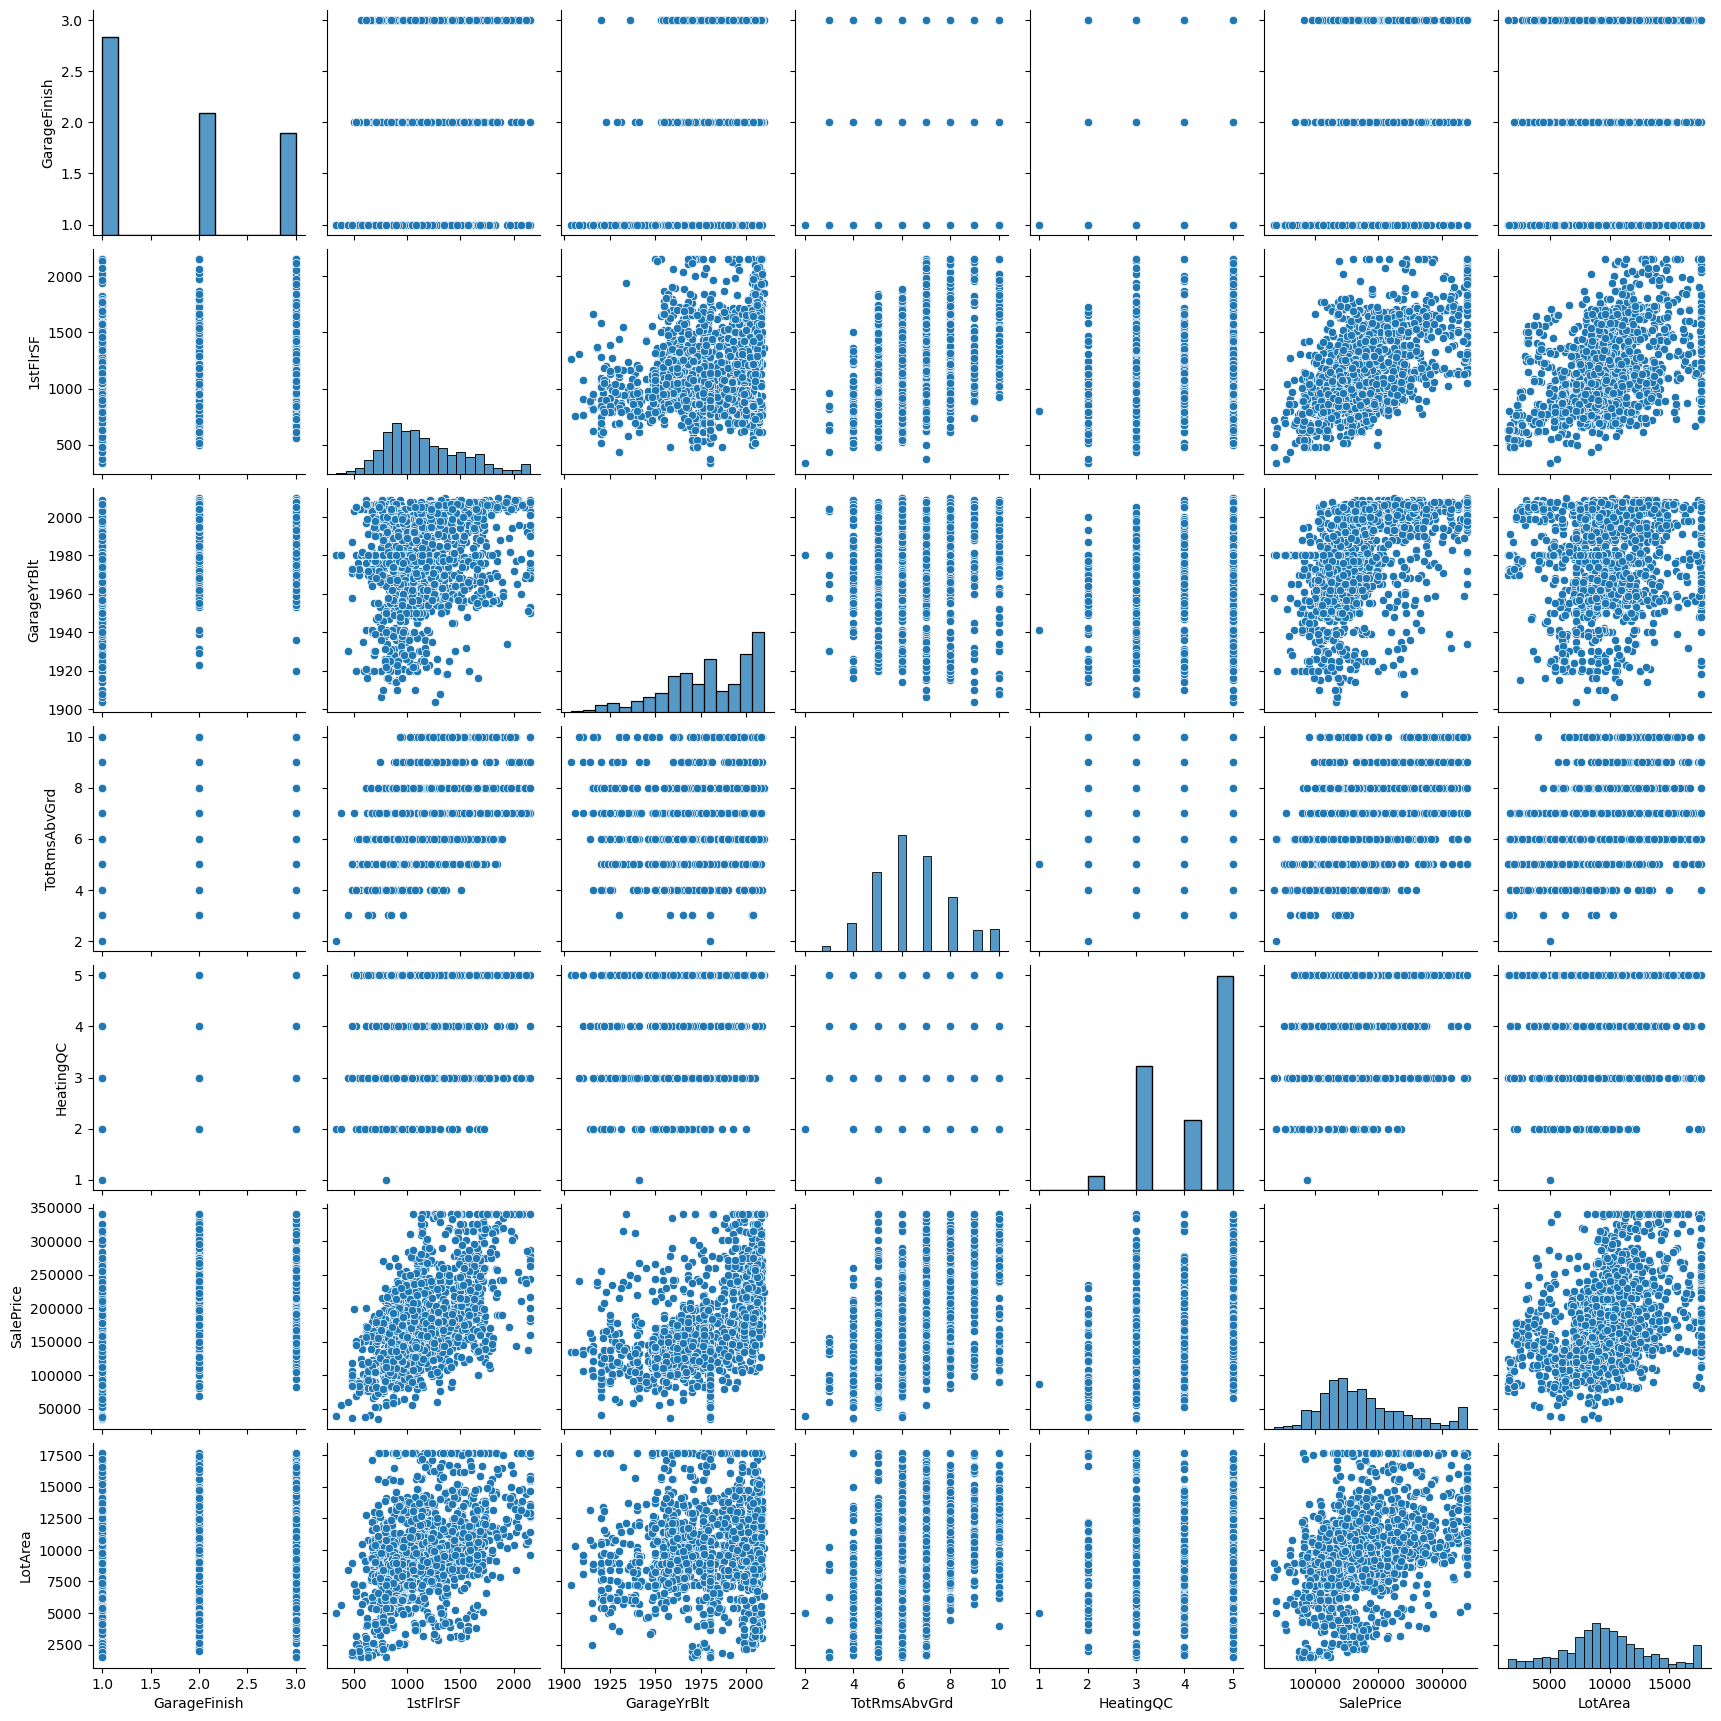

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train19.csv'
data = pd.read_csv(data_path)

# 数値変数だけに絞る、または特定の数値変数を選択
features = ['GarageFinish', '1stFlrSF', 'GarageYrBlt', 'TotRmsAbvGrd', 'HeatingQC', 'SalePrice', 'LotArea']
numerical_data = data[features].copy()

# 無限大の値をNaNに変換
numerical_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN値を削除
numerical_data.dropna(inplace=True)

# 警告を非表示にする設定
pd.set_option('mode.use_inf_as_na', False)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ペアプロットの作成
sns.pairplot(numerical_data)
plt.show()

# 警告を再表示に戻す設定（オプション）
pd.set_option('mode.use_inf_as_na', True)
warnings.simplefilter(action='default', category=FutureWarning)


# 2.新しい特徴量を作成する

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train19.csv'
train_df = pd.read_csv(data_path)

# 数値型データの処理
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_cols] = train_df[numeric_cols].replace([np.inf, -np.inf], np.nan)  # 無限大の値をNaNに置き換え
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())  # NaNを中央値で置き換える

# 新しい特徴量の作成
train_df['GrLivArea_OverallQual'] = train_df['GrLivArea'] * train_df['OverallQual']
# train_df['GarageArea_OverallQual'] = train_df['GarageArea'] * train_df['OverallQual']
train_df['TotalBsmtSF_OverallQual'] = train_df['TotalBsmtSF'] * train_df['OverallQual']
# train_df['GarageArea_TotalBsmtSF'] = train_df['GarageArea'] + train_df['TotalBsmtSF']
train_df['YearBuilt_YearRemodAdd'] = train_df['YearBuilt'] - train_df['YearRemodAdd']
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF'] + train_df['GarageArea']
train_df['QualityScore'] = train_df['OverallQual'] * train_df['ExterQual'] * train_df['KitchenQual'] * train_df['BsmtQual'] * train_df['GarageQual']
train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['OverallConditionArea'] = train_df['OverallCond'] * train_df['TotalArea']

# 新しい特徴量の追加(低価格の予測）
train_df['TotalRmsAbvGrd_OverallCond'] = train_df['TotRmsAbvGrd'] * train_df['OverallCond']
# train_df['Neighborhood_LotArea'] = train_df['Neighborhood'] * train_df['LotArea']
train_df['Functional_OverallQual'] = train_df['Functional'] * train_df['OverallQual']

#新しい特徴量の追加（高価格の予測)
train_df['log_LotArea'] = np.log1p(train_df['LotArea'])
train_df['sqrt_GrLivArea'] = np.sqrt(train_df['GrLivArea'])
train_df['OverallQual_GrLivArea'] = train_df['OverallQual'] * train_df['GrLivArea']

# 新しい特徴量の作成例：ログ変換、平方根変換、相互作用項など
train_df['log_1stFlrSF'] = np.log1p(train_df['1stFlrSF'])
train_df['sqrt_TotalBsmtSF'] = np.sqrt(train_df['TotalBsmtSF'])
train_df['OverallQual_TotalArea'] = train_df['OverallQual'] * train_df['TotalArea']
train_df['BsmtQual_ExterQual'] = train_df['BsmtQual'] * train_df['ExterQual']

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 保存
data_cleaned_path = os.path.join(save_dir, 'train_new_feature_engineered_draft.csv')
train_df.to_csv(data_cleaned_path, index=False)

print(f"新しい特徴量を追加してデータを保存しました: {data_cleaned_path}")



新しい特徴量を追加してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train_new_feature_engineered_draft.csv


# PCAの実行

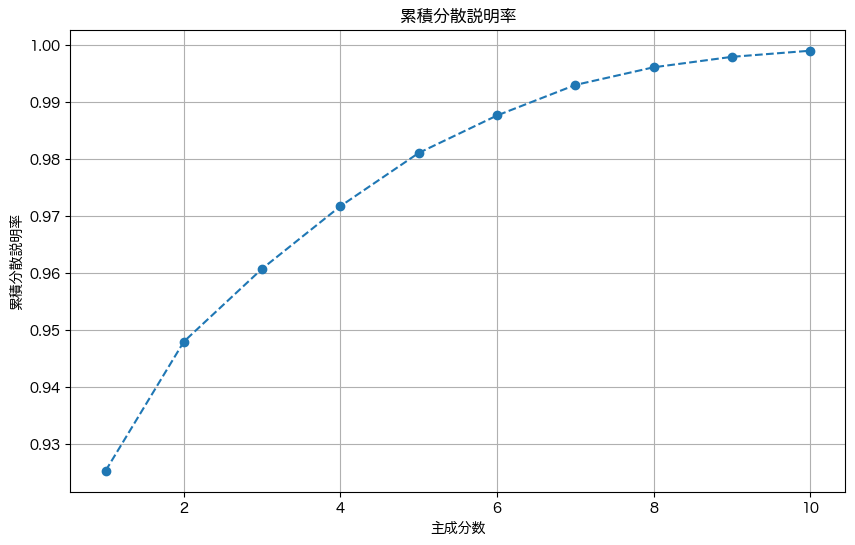

In [3]:
# 必要なライブラリのインポート
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features.csv'
data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 選択された特徴量
important_features = [
    'log_LotArea_OverallQual_TotalArea', 'KitchenQual_OverallQual_TotalArea', 
    'Functional_OverallQual_TotalArea', 'BsmtQual_OverallQual_TotalArea', 
    'KitchenQual_TotalArea', 'GrLivArea_QualityScore', 'OverallConditionArea_OverallQual_TotalArea',
    'QualityScore_OverallConditionArea', 'BsmtQual_GrLivArea_OverallQual', 
    'LotArea_QualityScore', 'GrLivArea_OverallQual_OverallQual_TotalArea', 
    'OverallConditionArea_BsmtQual_ExterQual', 'ExterQual_OverallQual_TotalArea', 
    'GrLivArea_OverallQual_TotalBsmtSF_OverallQual'
]

# 特徴量を分ける
X = data[important_features]

# PCAの実行
pca = PCA(n_components=10)  # 例えば10成分に削減
X_pca = pca.fit_transform(X)

# 主成分ごとの分散説明率を取得
explained_variance = pca.explained_variance_ratio_

# 累積分散説明率のプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('累積分散説明率')
plt.xlabel('主成分数')
plt.ylabel('累積分散説明率')
plt.grid()
plt.show()

# 次元削減後の特徴量を新しいデータフレームに保存
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# 次元削減後のデータフレームを保存
X_pca_df['SalePrice'] = data['SalePrice']
X_pca_df.to_csv('/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features_pca.csv', index=False)


# t-SNEの実装

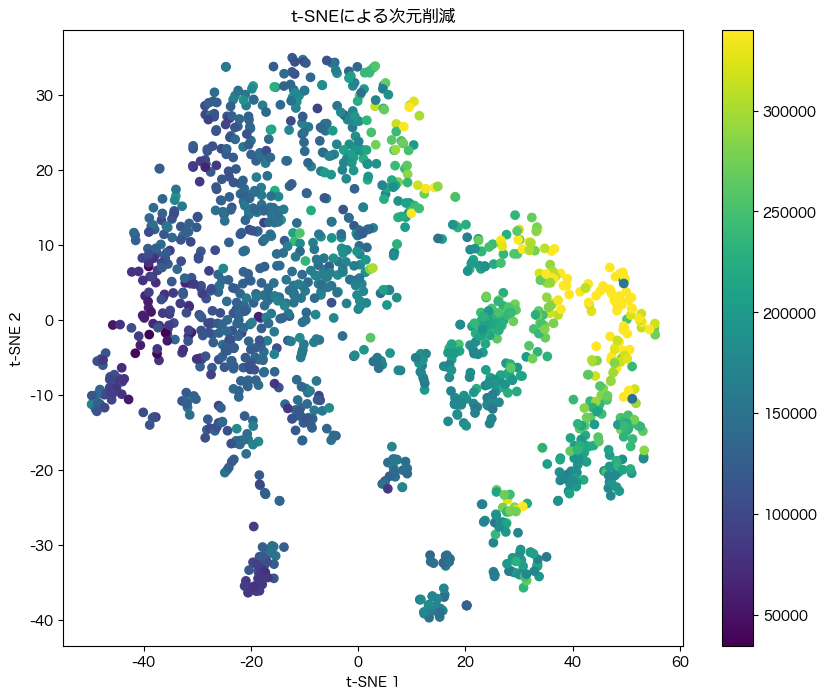

In [17]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_features.csv'
data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 特徴量と目的変数を分ける
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# t-SNEの実行
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# t-SNEのプロット
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(sc)
plt.title('t-SNEによる次元削減')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


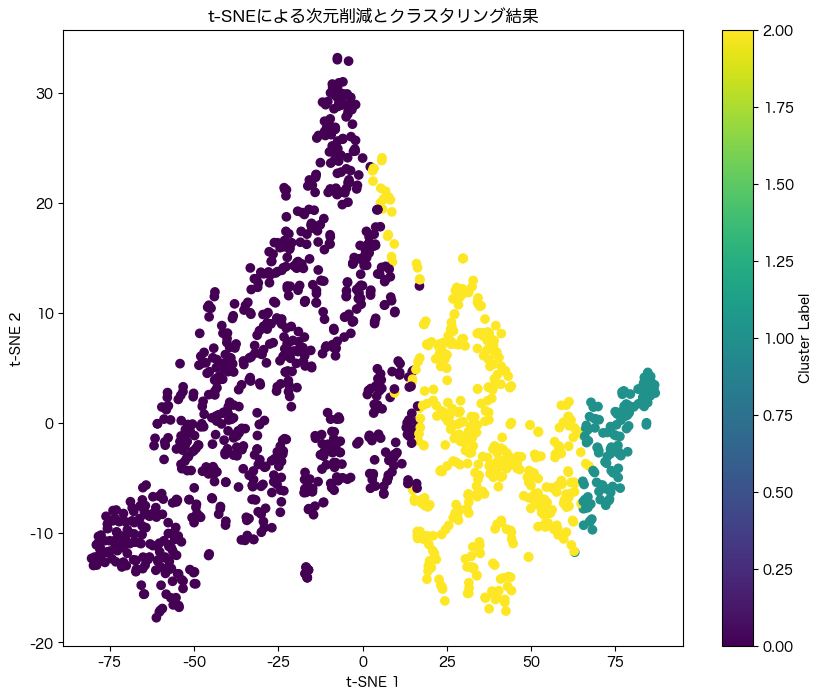

In [13]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features.csv'
data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 特徴量と目的変数を分ける
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# t-SNEの実行
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# K-meansクラスタリングの実行
kmeans = KMeans(n_clusters=3, random_state=42)  # クラスタ数は適宜変更してください
clusters = kmeans.fit_predict(X)

# t-SNEのプロット
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('t-SNEによる次元削減とクラスタリング結果')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# t-SNE結果とクラスタリングラベルの保存
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['SalePrice'] = y.values
tsne_df['Cluster'] = clusters
tsne_df.to_csv('/Users/hayakawakazue/Downloads/house_price/train/reduced_top_30_features_tsne_clusters.csv', index=False)


# UMAPの実装

In [19]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


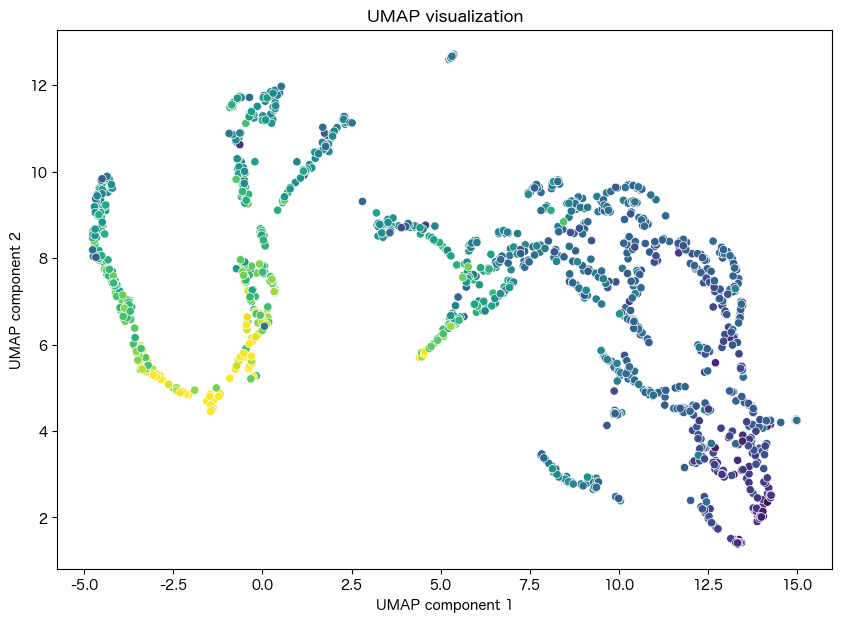

In [21]:
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_new_feature_engineered_draft.csv'
data = pd.read_csv(data_path)

# 必要な特徴量を選択
features = ['GrLivArea_OverallQual', 'GarageArea_OverallQual', 'TotalBsmtSF_OverallQual', 
            'GarageArea_TotalBsmtSF', 'YearBuilt_YearRemodAdd', 'TotalArea', 
            'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea']
X = data[features]

# UMAPの適用
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# UMAPの結果を可視化
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=data['SalePrice'], palette='viridis', legend=None)
plt.title('UMAP visualization')
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.show()


# ボックスプロットとバイオリンプロット

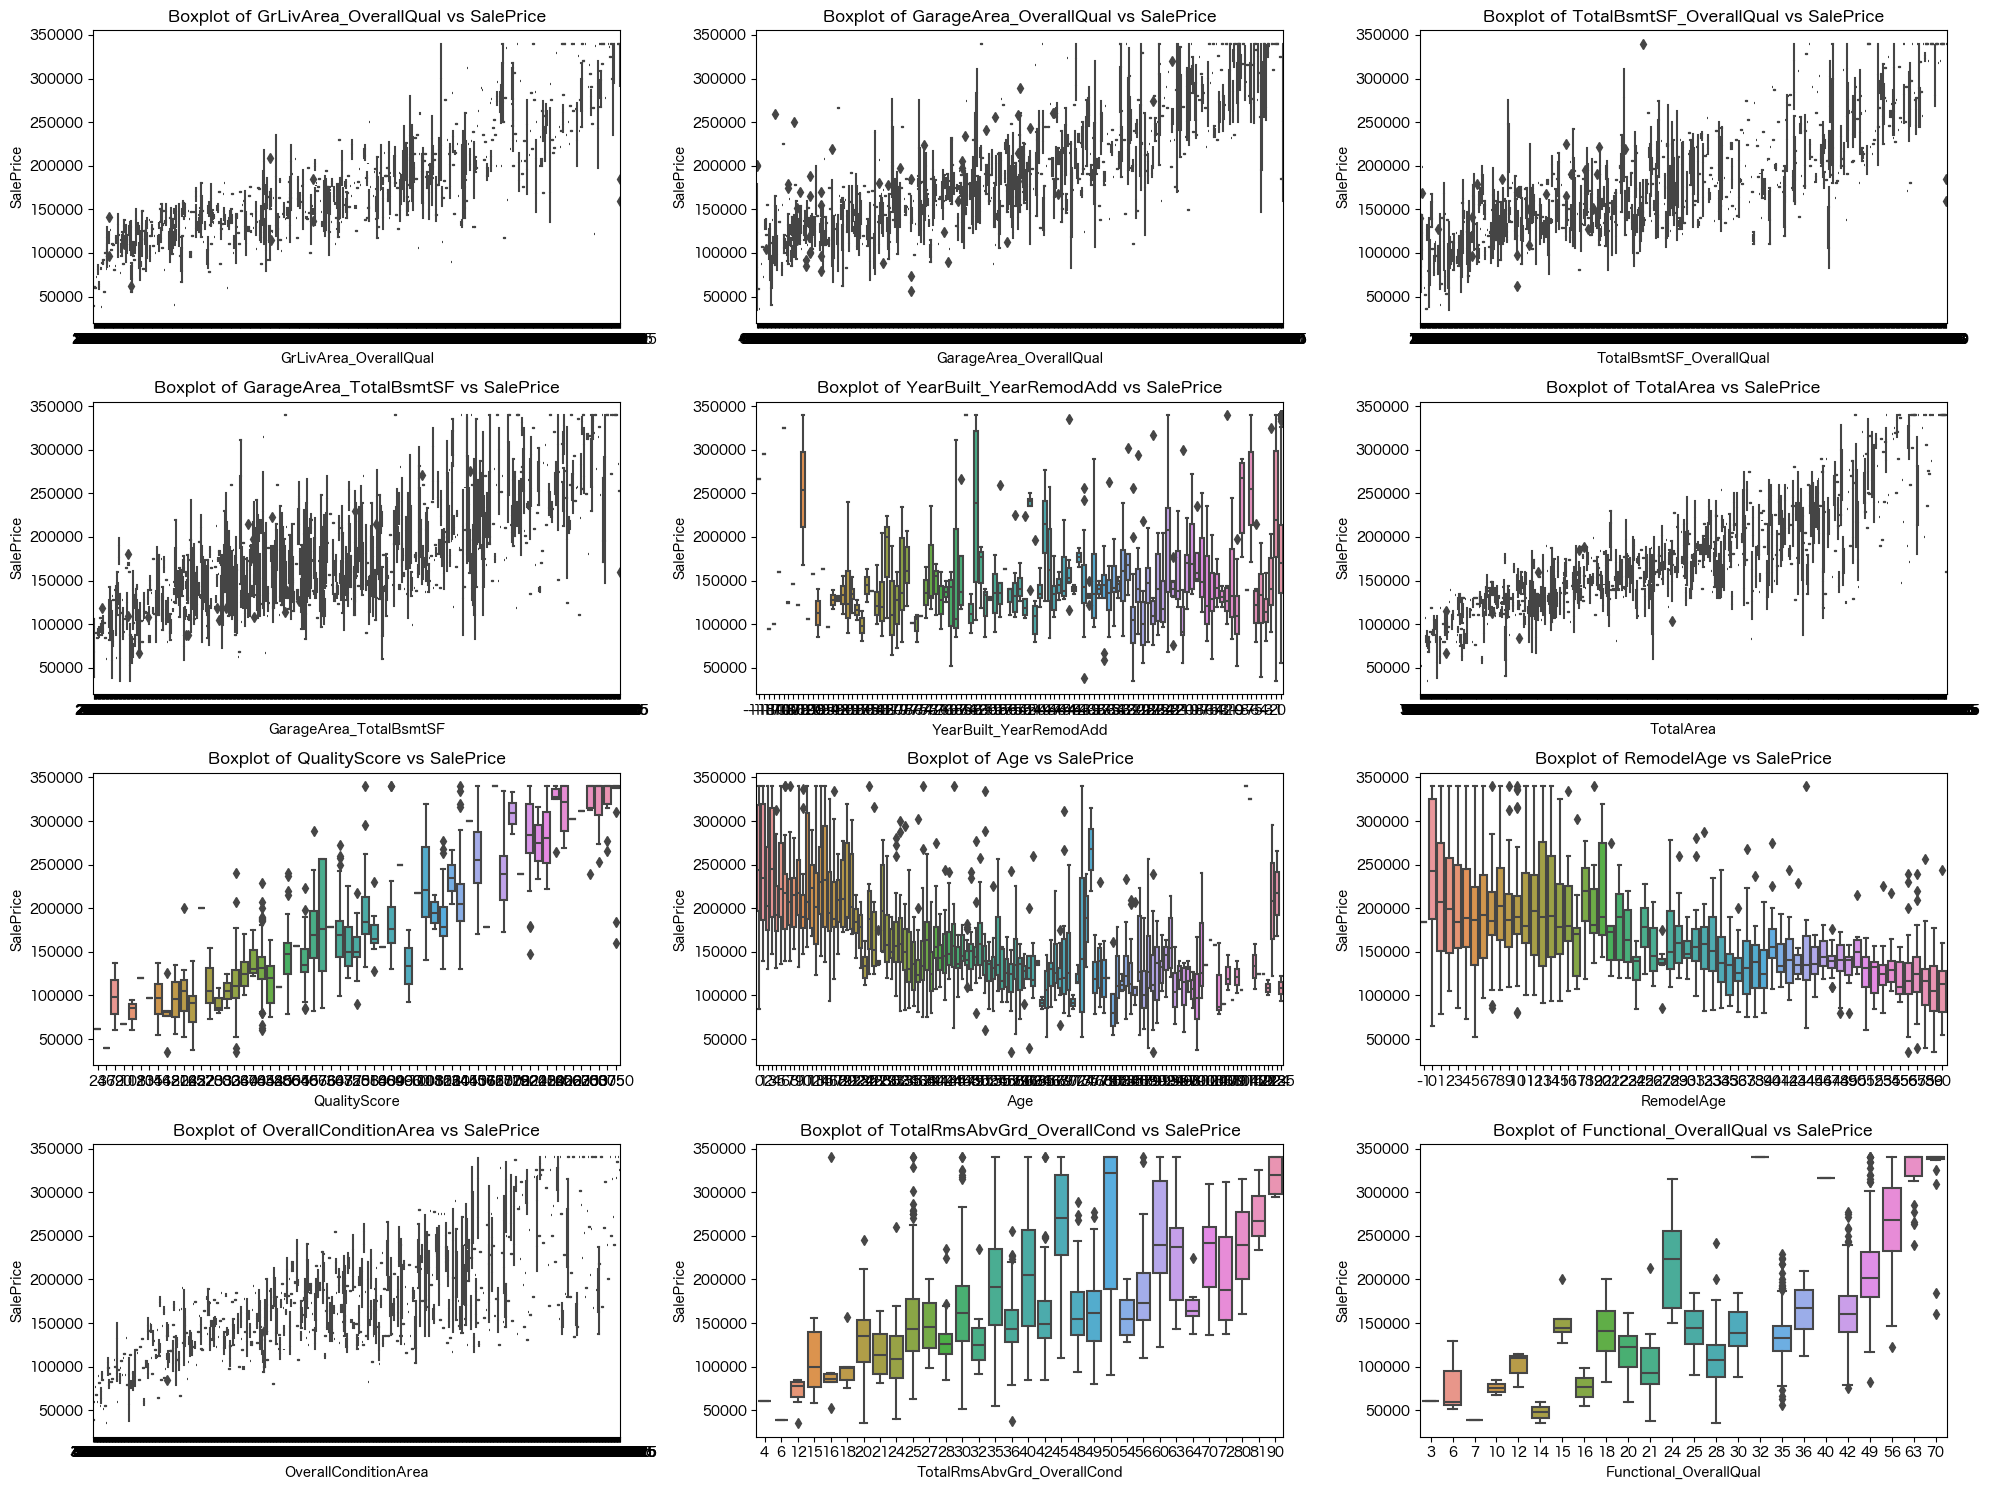

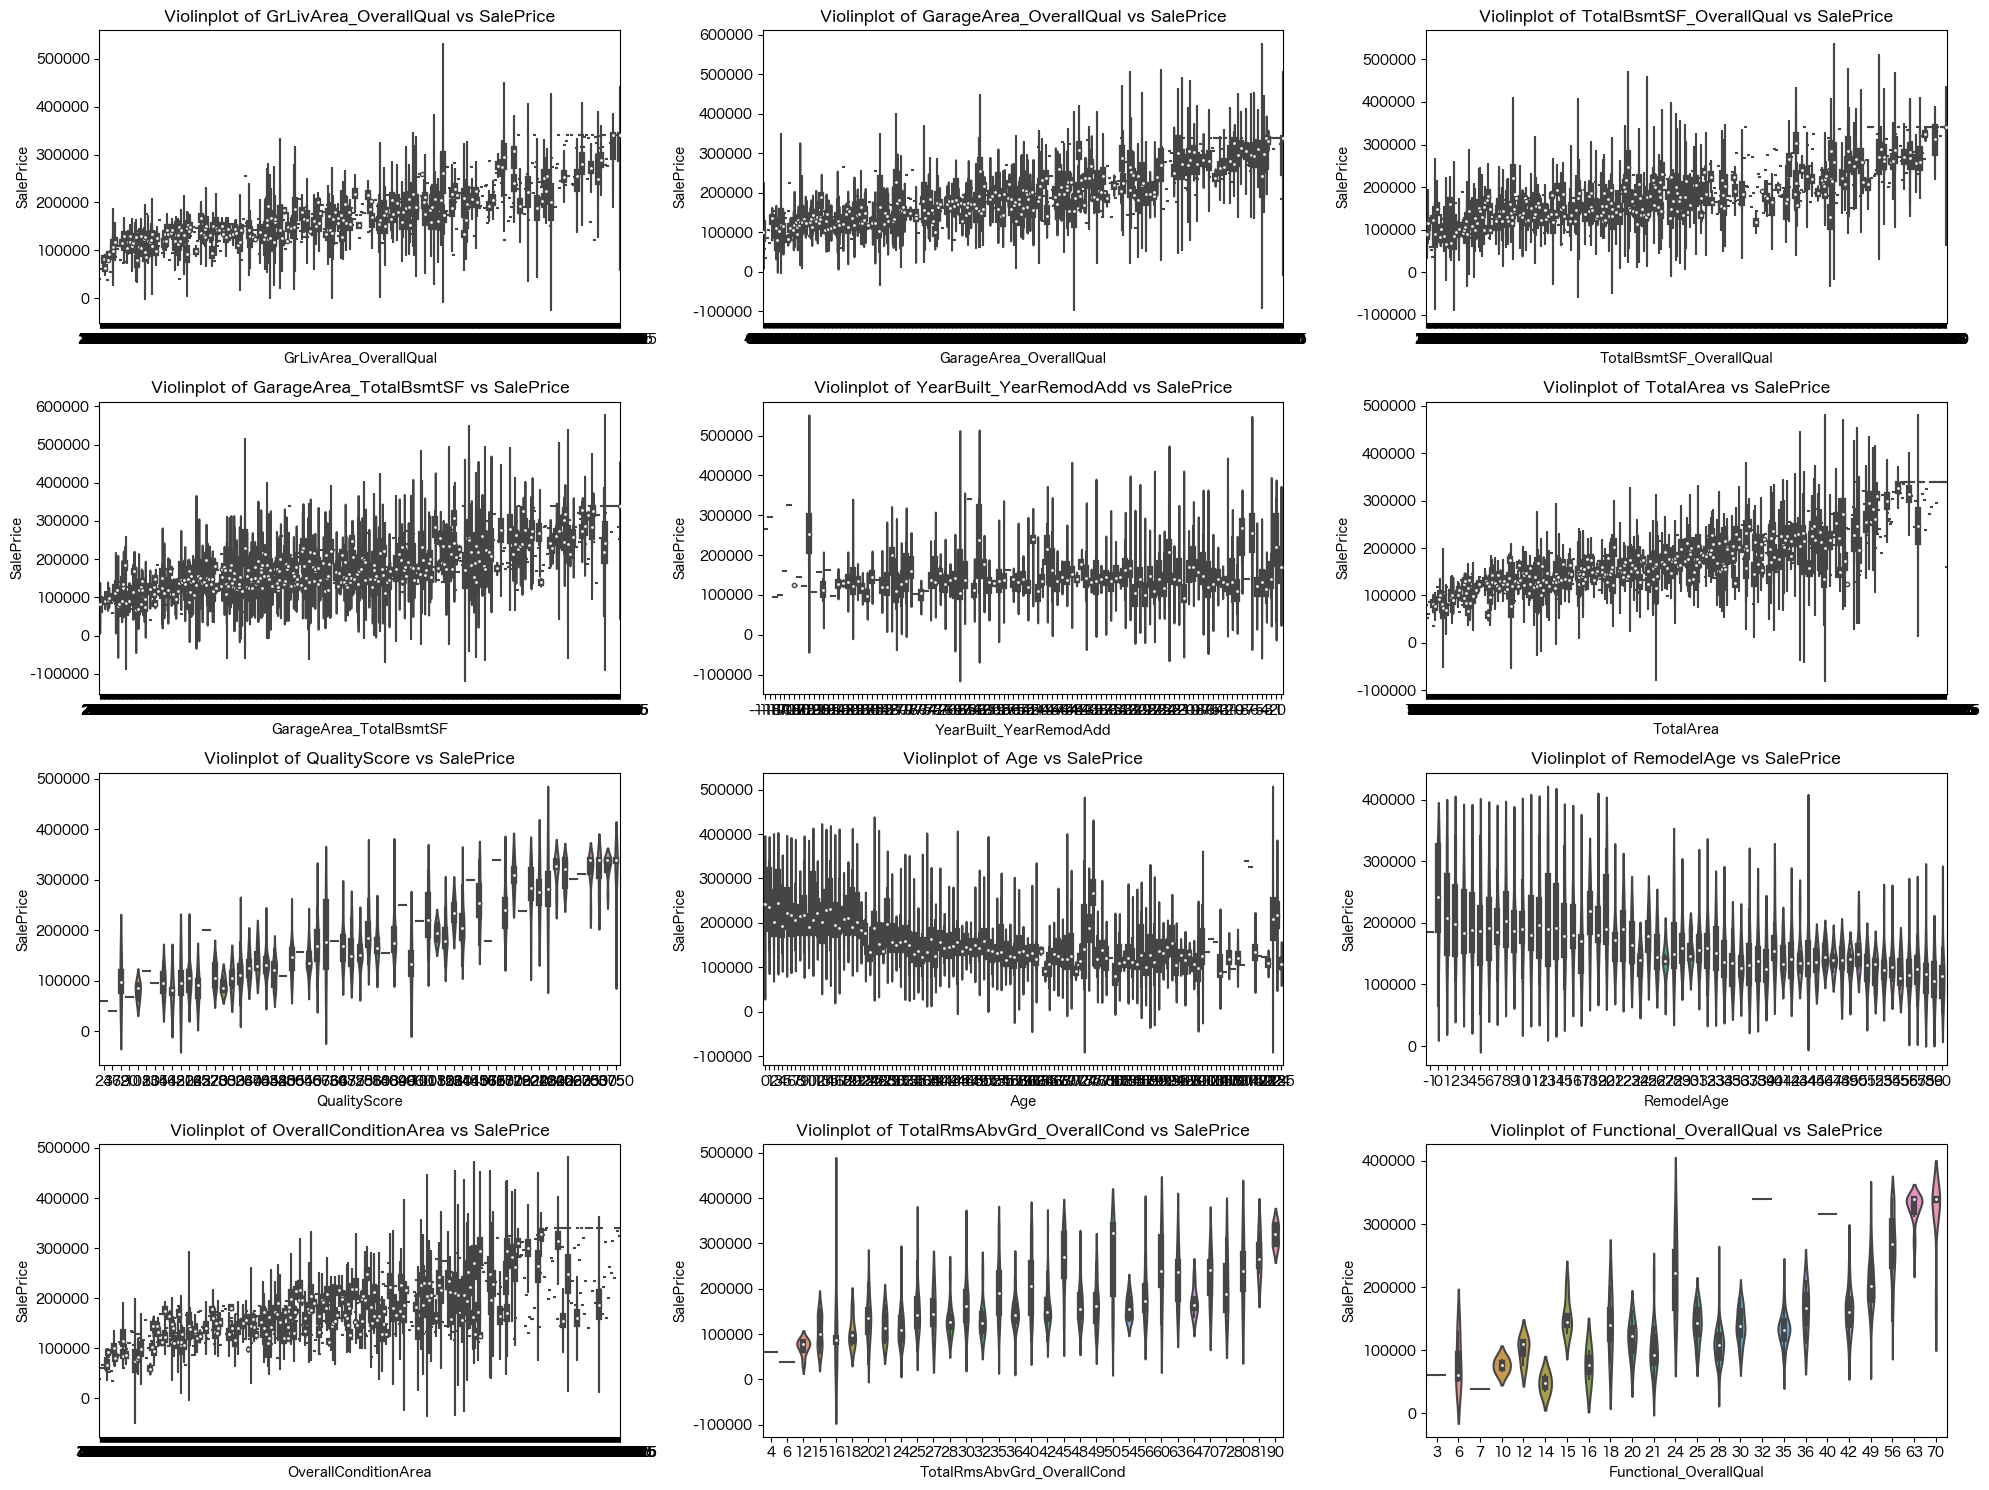

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_new_feature_engineered_draft.csv'
train_df = pd.read_csv(data_path)

# 新しい特徴量リスト
new_features = ['GrLivArea_OverallQual', 'GarageArea_OverallQual', 'TotalBsmtSF_OverallQual',
                'GarageArea_TotalBsmtSF', 'YearBuilt_YearRemodAdd', 'TotalArea',
                'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea',
                'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual']

# ボックスプロットの作成
plt.figure(figsize=(20, 15))
for i, feature in enumerate(new_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=train_df[feature], y=train_df['SalePrice'])
    plt.title(f'Boxplot of {feature} vs SalePrice')
plt.tight_layout()
plt.show()

# バイオリンプロットの作成
plt.figure(figsize=(20, 15))
for i, feature in enumerate(new_features, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x=train_df[feature], y=train_df['SalePrice'])
    plt.title(f'Violinplot of {feature} vs SalePrice')
plt.tight_layout()
plt.show()




# 特定の閾値以上の相関を持つ変数ペアを抽出する

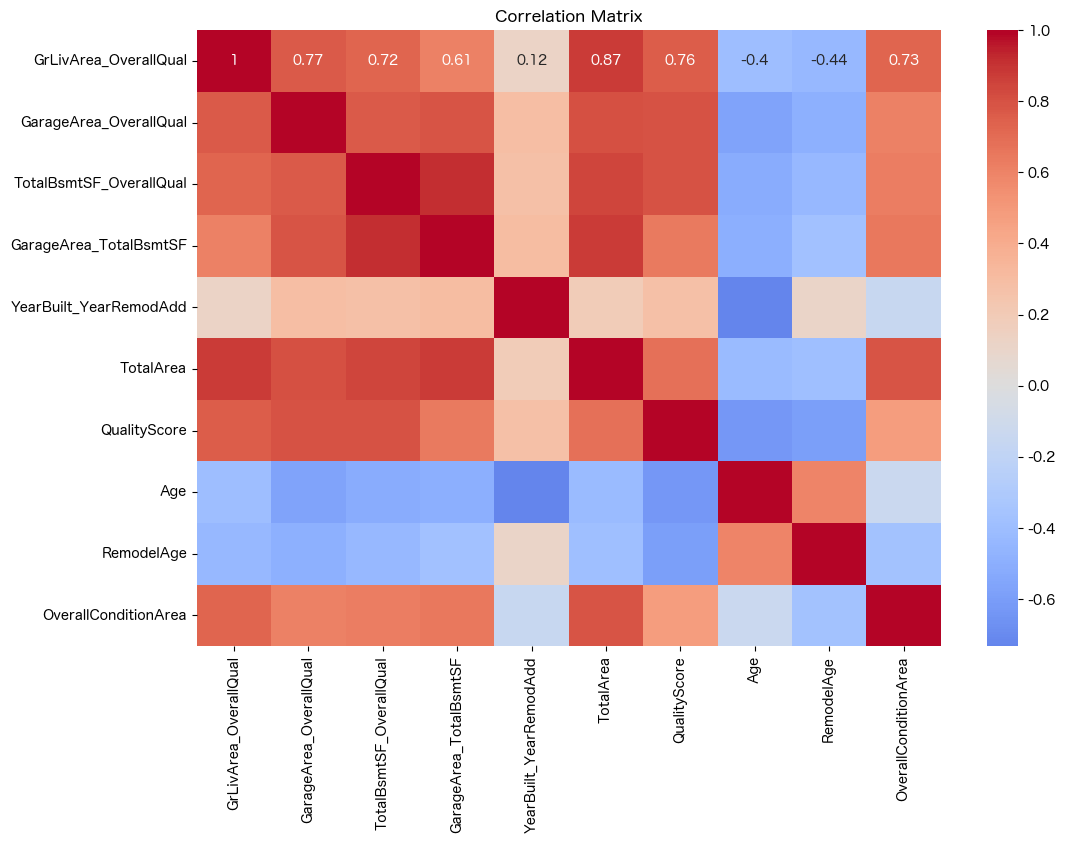

Correlation pairs with correlation above 0.8:
TotalBsmtSF_OverallQual and GarageArea_TotalBsmtSF: 0.92
GrLivArea_OverallQual and TotalArea: 0.87
GarageArea_OverallQual and TotalArea: 0.80
TotalBsmtSF_OverallQual and TotalArea: 0.85
GarageArea_TotalBsmtSF and TotalArea: 0.88


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_new_feature_engineered_draft.csv'
train_df = pd.read_csv(data_path)

# 特徴量の選択
features = ['GrLivArea_OverallQual', 'GarageArea_OverallQual', 'TotalBsmtSF_OverallQual', 
            'GarageArea_TotalBsmtSF', 'YearBuilt_YearRemodAdd', 'TotalArea', 
            'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea']

# 相関行列の計算
corr_matrix = train_df[features].corr()

# ヒートマップの作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 相関の閾値を設定
threshold = 0.8

# 閾値以上の相関を持つ変数ペアを抽出
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_pairs.append((rowname, colname, corr_matrix.iloc[i, j]))

# 結果の表示
print(f'Correlation pairs with correlation above {threshold}:')
for pair in high_corr_pairs:
    print(f'{pair[0]} and {pair[1]}: {pair[2]:.2f}')


# ヒートマップで再確認する


SalePriceとの相関:
 SalePrice                  1.000000
GrLivArea_OverallQual      0.859523
TotalArea                  0.852962
OverallQual                0.816856
QualityScore               0.810059
TotalBsmtSF_OverallQual    0.804281
Functional_OverallQual     0.772744
GrLivArea                  0.729311
OverallConditionArea       0.717714
ExterQual                  0.699291
KitchenQual                0.679995
GarageCars                 0.675896
BsmtQual                   0.671338
GarageArea                 0.660029
TotalBsmtSF                0.645251
1stFlrSF                   0.621873
FullBath                   0.583994
GarageFinish               0.571255
YearBuilt                  0.570327
YearRemodAdd               0.552061
TotRmsAbvGrd               0.539339
RemodelAge                -0.554206
Age                       -0.570820
Name: SalePrice, dtype: float64


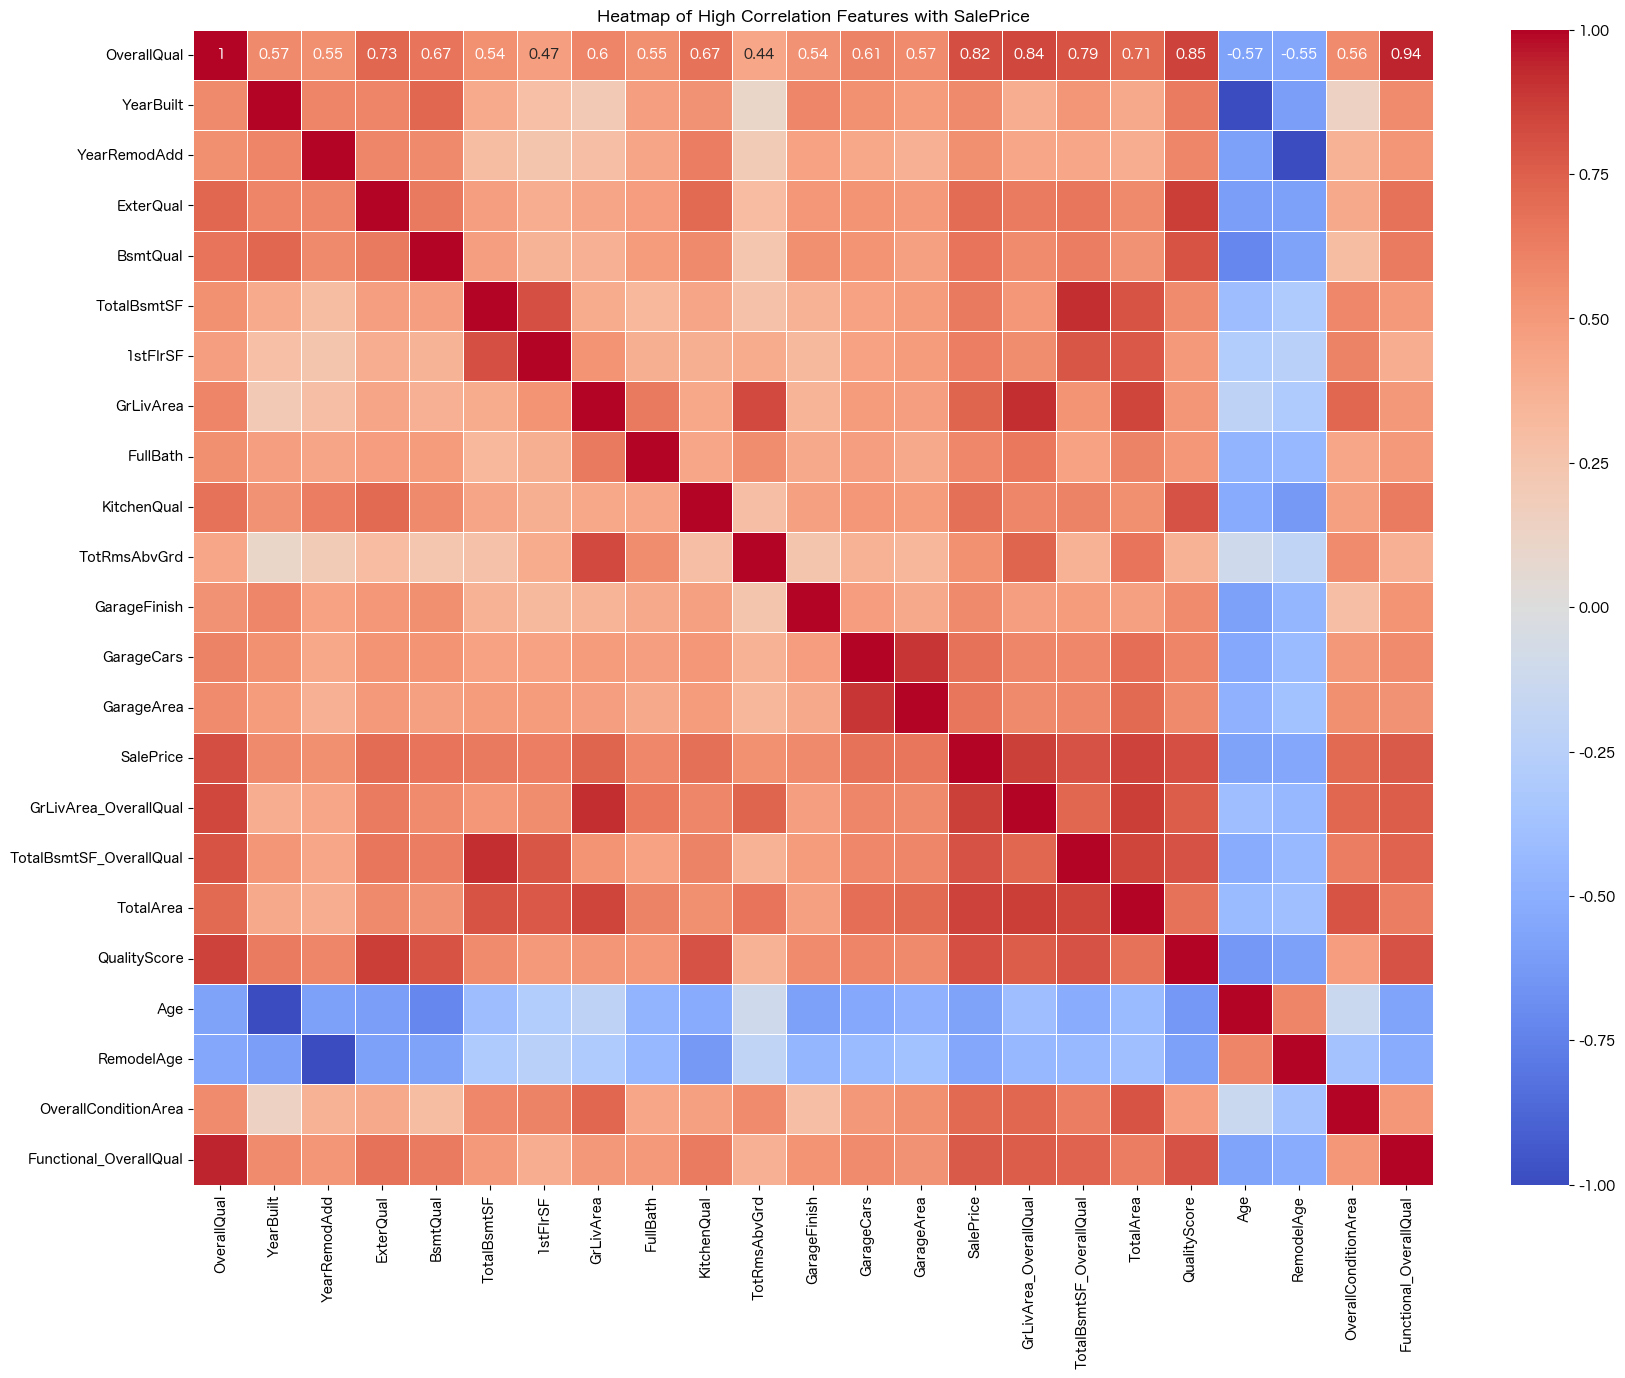

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_new_feature_engineered_draft.csv'
data_cleaned = pd.read_csv(data_path)

# 数値型の特徴量のみを対象とする
numeric_features = data_cleaned.select_dtypes(include=[np.number])

# SalePriceとの相関を計算
correlation_matrix = numeric_features.corr()

# 相関係数が0.5以上の特徴量を選択
high_correlation_features = correlation_matrix["SalePrice"][correlation_matrix["SalePrice"].abs() >= 0.5].index

# 選択された特徴量で相関行列を再作成
high_correlation_matrix = numeric_features[high_correlation_features].corr()

# SalePriceとの相関を取り出し、降順に並べ替える
saleprice_correlation = high_correlation_matrix["SalePrice"].sort_values(ascending=False)
print("\nSalePriceとの相関:\n", saleprice_correlation)

# ヒートマップをプロット
plt.figure(figsize=(20, 15))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap of High Correlation Features with SalePrice')
plt.show()

